In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [4]:
data = pd.read_csv("E:/AYUSHI/MICRO SQL/Taxi Riding Analysis/day.csv")

In [5]:
# Convert 'season' values to categorical
data['season'] = data['season'].map({1: 'spring', 2: 'summer', 3: 'fall', 4: 'winter'})

# Convert 'weathersit' values to categorical
data['weathersit'] = data['weathersit'].map({1: 'clear', 2: 'mist', 3: 'light_snow', 4: 'heavy_rain'})


In [6]:
# Select the features and target variable
features = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed']
target = 'cnt'

X = data[features]
y = data[target]


In [7]:
# Perform one-hot encoding
X = pd.get_dummies(X, drop_first=True)


In [8]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
# Initialize the Random Forest model
rf_model = RandomForestRegressor(random_state=42)

# Fit the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_model.predict(X_test)

# Calculate the root mean squared error
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 547.298092357305


In [11]:
# Summary statistics of numerical variables
data.describe()

# Count of unique values in categorical variables
data['season'].value_counts()
data['weathersit'].value_counts()

# Correlation matrix
correlation_matrix = data.corr(numeric_only=True)



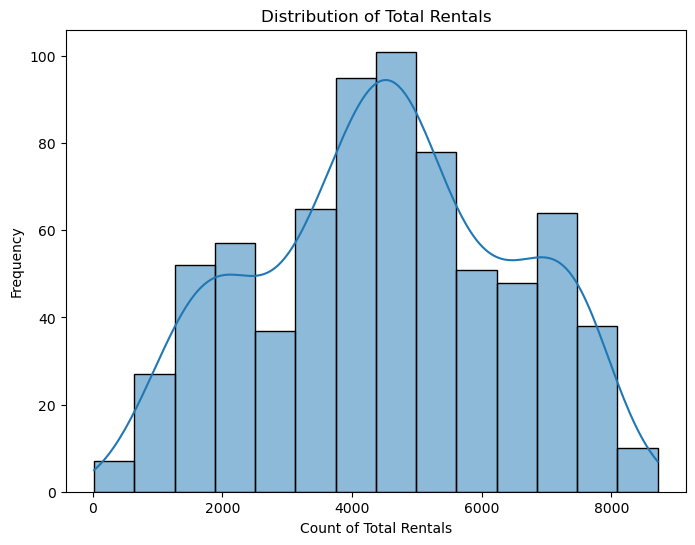

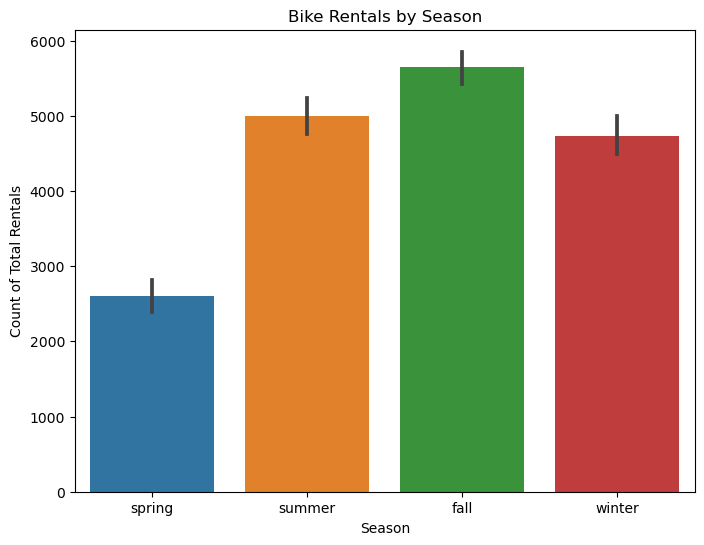

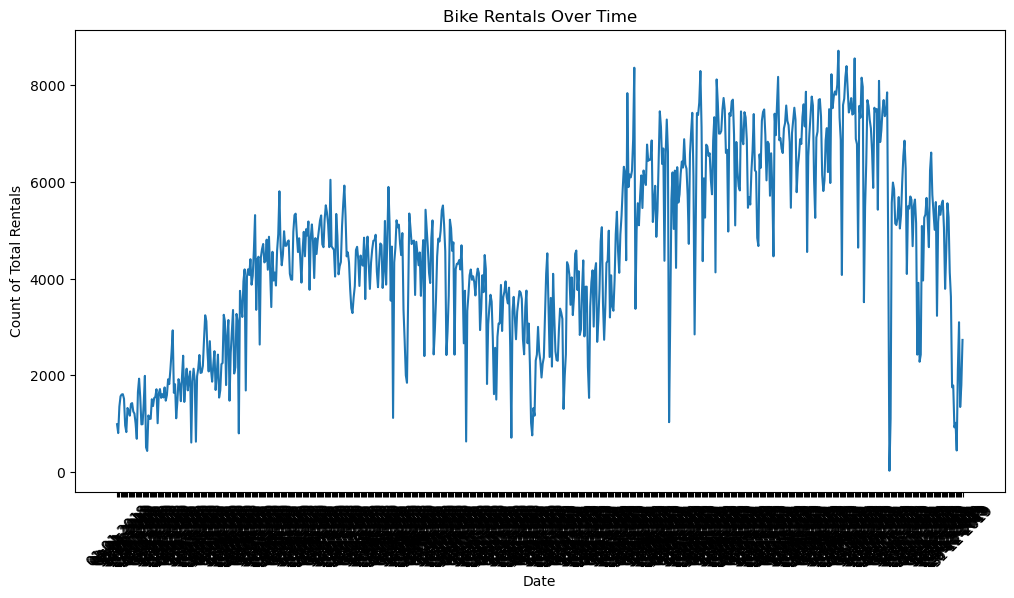

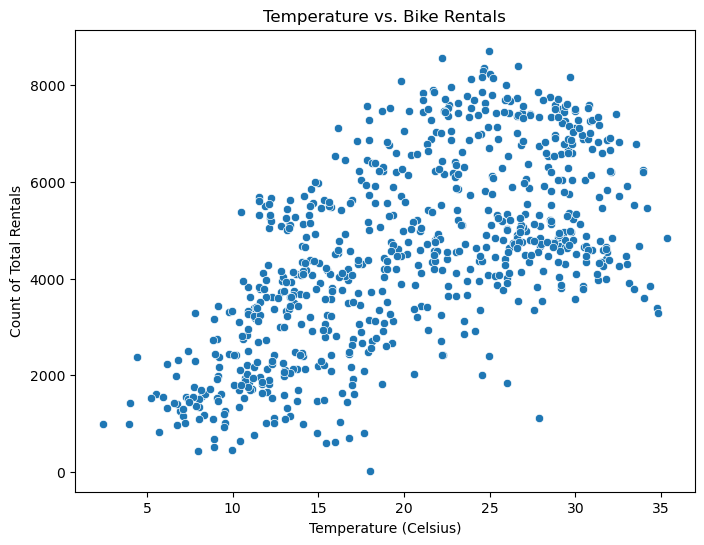

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of the target variable
plt.figure(figsize=(8, 6))
sns.histplot(data['cnt'], kde=True)
plt.xlabel('Count of Total Rentals')
plt.ylabel('Frequency')
plt.title('Distribution of Total Rentals')
plt.show()

# Bar plot of bike rentals by season
plt.figure(figsize=(8, 6))
sns.barplot(x='season', y='cnt', data=data)
plt.xlabel('Season')
plt.ylabel('Count of Total Rentals')
plt.title('Bike Rentals by Season')
plt.show()

# Line plot of bike rentals over time (date)
plt.figure(figsize=(12, 6))
sns.lineplot(x='dteday', y='cnt', data=data)
plt.xlabel('Date')
plt.ylabel('Count of Total Rentals')
plt.title('Bike Rentals Over Time')
plt.xticks(rotation=45)
plt.show()

# Scatter plot of temperature vs. bike rentals
plt.figure(figsize=(8, 6))
sns.scatterplot(x='temp', y='cnt', data=data)
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Count of Total Rentals')
plt.title('Temperature vs. Bike Rentals')
plt.show()


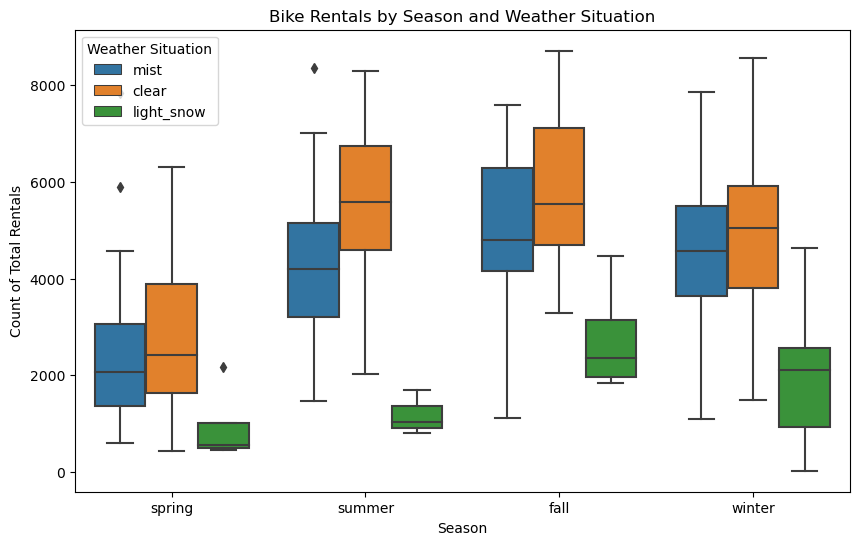

In [13]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', hue='weathersit', data=data)
plt.xlabel('Season')
plt.ylabel('Count of Total Rentals')
plt.title('Bike Rentals by Season and Weather Situation')
plt.legend(title='Weather Situation')
plt.show()


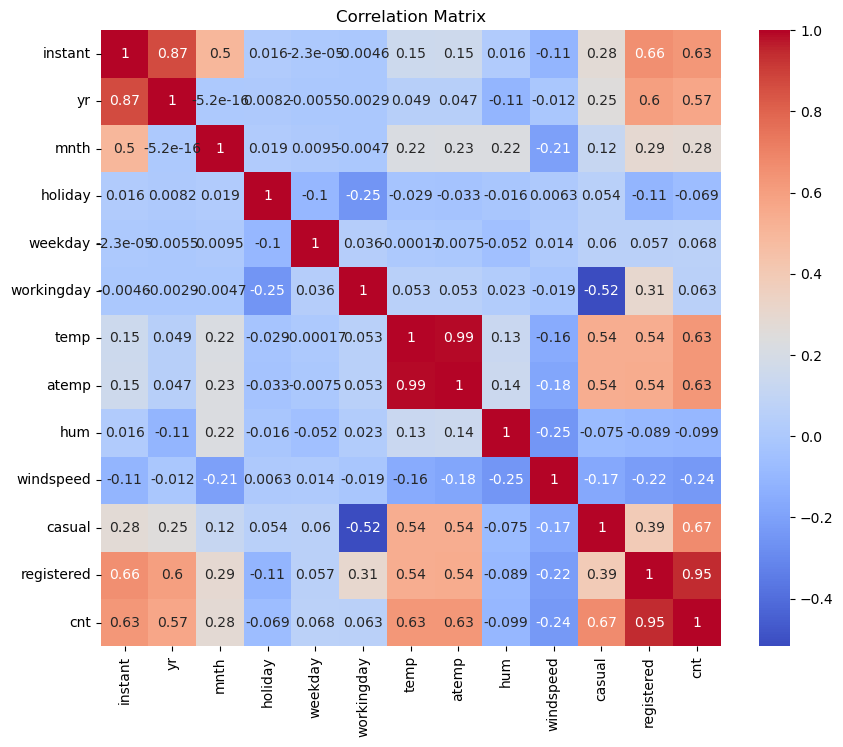

In [14]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


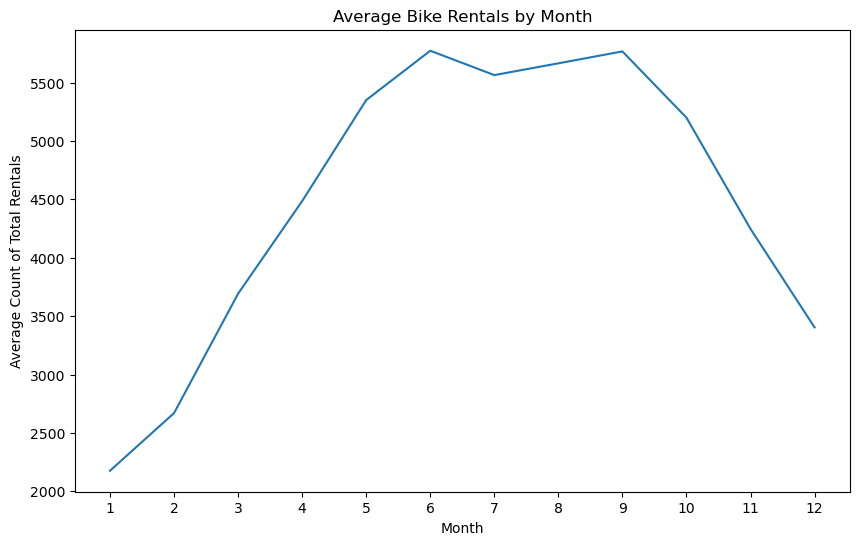

In [15]:
monthly_avg_rentals = data.groupby('mnth')['cnt'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='mnth', y='cnt', data=monthly_avg_rentals)
plt.xlabel('Month')
plt.ylabel('Average Count of Total Rentals')
plt.title('Average Bike Rentals by Month')
plt.xticks(range(1, 13))
plt.show()


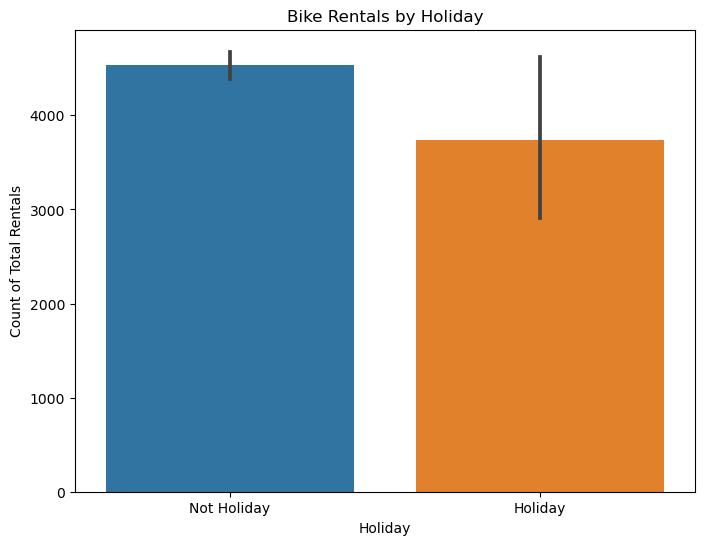

In [16]:
plt.figure(figsize=(8, 6))
sns.barplot(x='holiday', y='cnt', data=data)
plt.xlabel('Holiday')
plt.ylabel('Count of Total Rentals')
plt.title('Bike Rentals by Holiday')
plt.xticks([0, 1], ['Not Holiday', 'Holiday'])
plt.show()
